In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
database1 = automap_base()
# reflect the tables
database1.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
database1.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
HI_measurement = database1.classes.measurement 
HI_station = database1.classes.station

In [8]:
# Create our session (link) from Python to the DB
session_link = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspect = inspect(engine)
columns = inspect.get_columns('measurement')   
columns1 = inspect.get_columns("station")


In [10]:
mr_date = session_link.query(HI_measurement.date).order_by(HI_measurement.date.desc()).first()
print(mr_date)

('2017-08-23',)


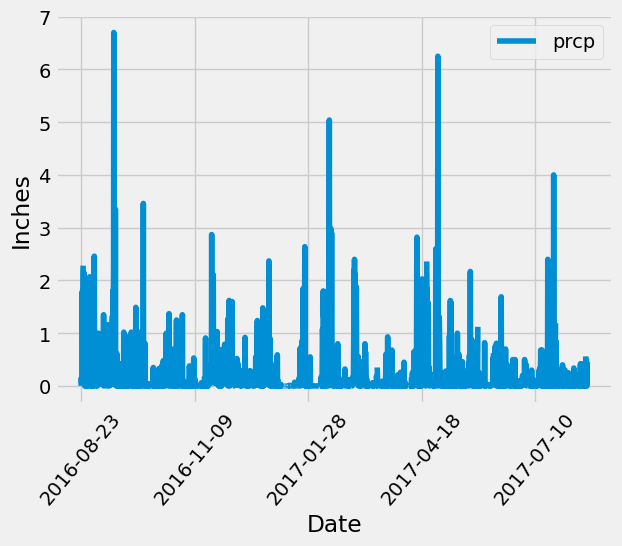

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
prcp_12_months = session_link.query(HI_measurement.date, HI_measurement.prcp).\
    filter(HI_measurement.date > '2016-08-22').\
    order_by(HI_measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
prcp_12_months_df = pd.DataFrame(prcp_12_months)
prcp_df = prcp_12_months_df.set_index("date")
prcp_df




# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xticks(rotation=50)
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
all_stations = session_link.query(HI_station.station).count()
all_stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_activity = session_link.query(HI_measurement.station,func.count(HI_measurement.station)).order_by(func.count(HI_measurement.station).desc()).group_by(HI_measurement.station).all() 

stations_activity 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
highest_active_station = session_link.query(HI_measurement.station,func.count(HI_measurement.station)).order_by(func.count(HI_measurement.station).desc()).group_by(HI_measurement.station).first()
highest_station_num = highest_active_station[0]
highest_station_num

lowest_temp = session_link.query(func.min(HI_measurement.tobs)).filter(HI_measurement.station == highest_station_num ).all()

highest_temp = session_link.query(func.max(HI_measurement.tobs)).filter(HI_measurement.station == highest_station_num ).all()

average_temp = session_link.query(func.avg(HI_measurement.tobs)).filter(HI_measurement.station == highest_station_num ).all()


print(lowest_temp, highest_temp, average_temp)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


Text(0, 0.5, 'Frequency')

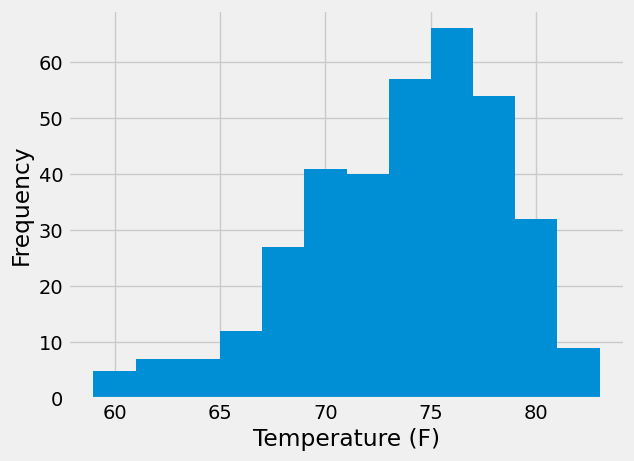

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

one_year_station_dates = session_link.query(HI_measurement.date, HI_measurement.tobs).filter(HI_measurement.station == highest_station_num).order_by(HI_measurement.date.desc()).first()


station_data = session_link.query(HI_measurement.date, HI_measurement.tobs).filter(HI_measurement.station == highest_station_num).filter(HI_measurement.date > '2016-08-17').all()



station_data_df = pd.DataFrame(station_data)["tobs"]
station_data_df 

hist = station_data_df.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')

# Close Session

In [17]:
# Close Session
session_link.close()